<a href="https://colab.research.google.com/github/yugant10-commits/docsumo/blob/master/image_alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytesseract -q

In [ ]:
! apt install tesseract-ocr -q
! apt install libtesseract-dev -q

In [ ]:
import pytesseract

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import re
from PIL import Image
import imutils

In [ ]:
def correct_skew(image):

  def check_orientation(img):
    rot_data = pytesseract.image_to_osd( img)
    rot = re.search('(?<=Rotate: )\d+', rot_data).group(0)
    angle = float(rot)
    return angle
  def fix_orientation(img, angle):
    rotated = imutils.rotate_bound(img, angle)
    new_angle = check_orientation(rotated)
    print(pytesseract.image_to_osd(rotated))
    if new_angle == 0:
      return rotated
    else:
      rotated = imutils.rotate_bound(rotated, new_angle)
      # print(pytesseract.image_to_osd(rotated))
      return rotated

  def fix_skew(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    thresh = cv2.threshold(gray, 0, 255, 
                      cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    coords = np.column_stack(np.where(thresh > 0))
    height, width = image.shape[:2]
    center = (width//2, height//2)
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
      angle = -(90 + angle)
    else:
      angle = -angle
    m = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, m, (width, height),
                            flags=cv2.INTER_CUBIC,
                            borderMode=cv2.BORDER_REPLICATE)
    return rotated
  try:
    angle = check_orientation(img)
    print(angle)
    fixed = fix_orientation(image, angle)
    fixed_image = fix_skew(fixed)
  except:
    fixed_image = fix_skew(image)
  return fixed_image



0.0
Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 2.54
Script: Cyrillic
Script confidence: 1.07



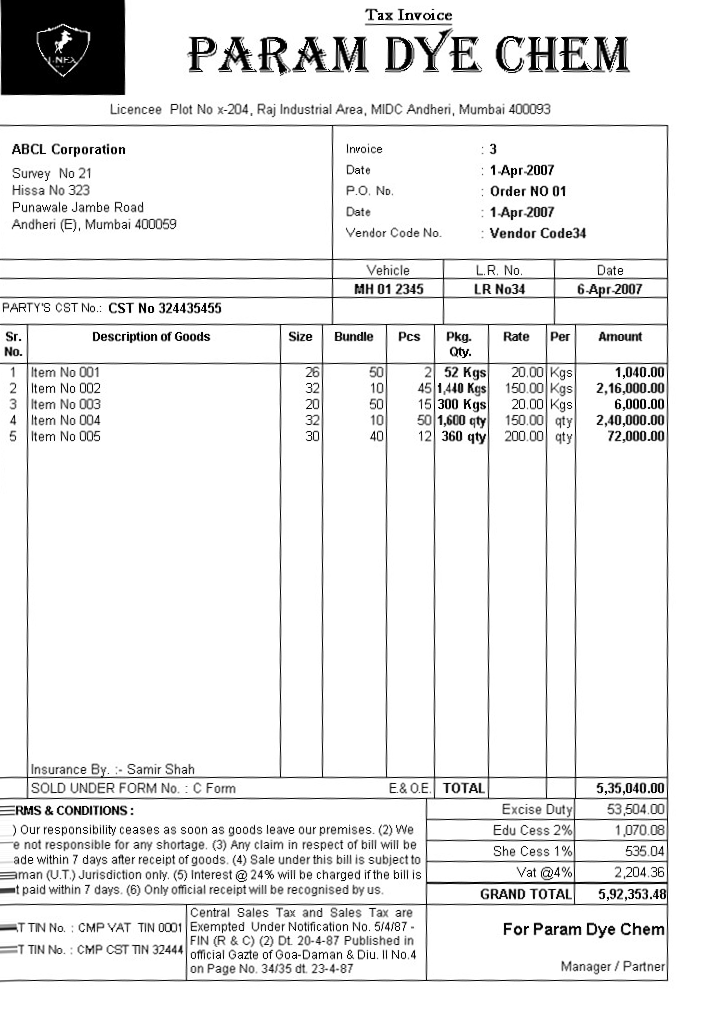

True

In [35]:
img = cv2.imread('/content/AWT009.jpg')
corected = correct_skew(img)
cv2_imshow(corected)
cv2.imwrite('AWT009-corrected.jpg', corected)